In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import numpy as np

from common.viz import plot_opinions_over_time, plot_campaign_budgets_with_order

from rl_envs_forge.envs.network_graph.network_graph import NetworkGraph


ModuleNotFoundError: No module named 'algos'

In [7]:
def create_adjacency_matrix_from_links(num_nodes, links):
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    for link in links:
        from_node, to_node = link
        # adjacency_matrix[from_node, to_node] = 1
        adjacency_matrix[to_node, from_node] = 1

    return adjacency_matrix


def init_env():
    links = [
        (1, 3),
        (3, 2),
        (2, 3),
        (2, 0),
        (0, 2),
        (1, 2),
        (0, 1),
    ]

    num_nodes = 4
    connectivity_matrix = create_adjacency_matrix_from_links(num_nodes, links)
    # connectivity_matrix = normalize_adjacency_matrix(connectivity_matrix)

    initial_opinions = np.linspace(0.7, 0, num_nodes)
    # initial_opinions = np.linspace(0, 1, num_nodes)
    # initial_opinions = (np.mod(np.arange(0, 0.1 * num_nodes, 0.1), 0.9)) + 0.1

    env = NetworkGraph(
        connectivity_matrix=connectivity_matrix,
        initial_opinions=initial_opinions,
        max_u=0.5,
        budget=1000.0,
        desired_opinion=0.9,
        tau=0.5,
        max_steps=1_000_000,
    )

    env.reset()

    return env

[0.7        0.46666667 0.23333333 0.        ]


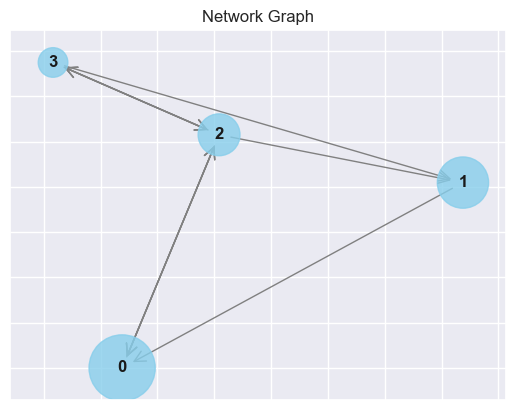

In [9]:
env = init_env()
print(env.opinions)
env.render(mode="matplotlib")

In [ ]:
import numpy as np
from viz import plot_opinions_over_time, plot_campaign_budgets_with_order
from algos import (
    compute_expected_value_for_budget_distribution,
    dynamic_programming_with_grid,
    forward_propagation_with_grid,
)
from rl_envs_forge.envs.network_graph.network_graph import NetworkGraph

from algos import *

# softmax in last layer because it scales with N instead of 2^N where N is the nr of agents

# might need to do policy gradient

# next step: Q iteration with action representation